# Day 97: Exploratory Data Analysis and Advanced Feature Engineering

Welcome to Day 97 of the 100 Days of Machine Learning challenge! As we enter the capstone project phase, this lesson focuses on two critical skills for building successful end-to-end machine learning projects: comprehensive exploratory data analysis (EDA) and advanced feature engineering techniques.

In real-world machine learning projects, the quality of your features often matters more than the choice of algorithm. As the saying goes, "garbage in, garbage out." This lesson will equip you with the tools and techniques to extract maximum value from your data through systematic exploration and intelligent feature creation.

## Why This Matters

Before building any machine learning model, you need to understand your data deeply. Exploratory Data Analysis helps you:
- Identify data quality issues (missing values, outliers, inconsistencies)
- Understand relationships between variables
- Discover patterns and anomalies
- Make informed decisions about preprocessing and modeling strategies

Feature engineering is often the difference between a mediocre model and a high-performing one. Advanced feature engineering allows you to:
- Create more informative representations of your data
- Capture complex relationships that raw features miss
- Improve model performance and interpretability
- Reduce dimensionality while preserving information

## Learning Objectives

By the end of this lesson, you will be able to:
1. Perform comprehensive exploratory data analysis using statistical and visual techniques
2. Identify and handle data quality issues systematically
3. Apply advanced feature engineering techniques including polynomial features, interaction terms, and domain-specific transformations
4. Use feature selection methods to identify the most important features
5. Implement a complete EDA and feature engineering pipeline for a real-world dataset

# Theory: Exploratory Data Analysis

## What is EDA?

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA was promoted by John Tukey in the 1970s to encourage statisticians to explore the data and possibly formulate hypotheses that could lead to new data collection and experiments.

## Statistical Foundations of EDA

### Descriptive Statistics

The foundation of EDA rests on descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.

**Measures of Central Tendency:**
- **Mean**: The arithmetic average, defined as $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$
- **Median**: The middle value when data is ordered, less sensitive to outliers than the mean
- **Mode**: The most frequently occurring value in the dataset

**Measures of Dispersion:**
- **Variance**: Measures how far values spread from the mean: $\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$
- **Standard Deviation**: The square root of variance: $\sigma = \sqrt{\sigma^2}$
- **Interquartile Range (IQR)**: The difference between the 75th and 25th percentiles: $IQR = Q_3 - Q_1$

### Distribution Analysis

Understanding the distribution of your data is crucial for selecting appropriate models and transformations.

**Skewness**: Measures the asymmetry of the distribution
$$\text{Skewness} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}{\sigma^3}$$

- Skewness = 0: Symmetric distribution (like normal distribution)
- Skewness > 0: Right-skewed (tail on the right)
- Skewness < 0: Left-skewed (tail on the left)

**Kurtosis**: Measures the "tailedness" of the distribution
$$\text{Kurtosis} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{\sigma^4}$$

### Correlation Analysis

The **Pearson correlation coefficient** measures linear relationships between variables:
$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear correlation.

# Theory: Advanced Feature Engineering

## What is Feature Engineering?

Feature engineering is the process of using domain knowledge and statistical techniques to create new features from existing data that make machine learning algorithms work better. It's often considered more of an art than a science, requiring creativity, domain expertise, and experimentation.

## Mathematical Foundations

### Polynomial Features

Polynomial features allow us to capture non-linear relationships. For features $x_1, x_2$, polynomial features of degree 2 include:
$$\{1, x_1, x_2, x_1^2, x_2^2, x_1x_2\}$$

For degree $d$, the number of features grows as:
$$\binom{n+d}{d} = \frac{(n+d)!}{n!d!}$$

where $n$ is the number of original features.

### Interaction Features

Interaction features capture how features work together. For two features $x_1$ and $x_2$, the interaction is simply their product:
$$x_{\text{interaction}} = x_1 \times x_2$$

### Mathematical Transformations

Common transformations include:
- **Logarithmic**: $x' = \log(x + c)$ (useful for skewed data)
- **Square Root**: $x' = \sqrt{x}$ (reduces right skewness)
- **Box-Cox**: $x' = \frac{x^\lambda - 1}{\lambda}$ for $\lambda \neq 0$, $x' = \log(x)$ for $\lambda = 0$

### Feature Scaling

**Min-Max Normalization**: Scales features to a fixed range [0, 1]
$$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$

**Standardization (Z-score normalization)**: Centers data around mean with unit variance
$$x' = \frac{x - \mu}{\sigma}$$

## Feature Selection

Not all features are equally valuable. Feature selection helps identify the most important features.

**Variance Threshold**: Remove features with low variance (nearly constant)

**Univariate Selection**: Select features based on statistical tests (chi-squared, ANOVA F-value)

**Recursive Feature Elimination (RFE)**: Recursively remove features and build model on remaining features

# Python Implementation: Comprehensive EDA

Let's start by importing necessary libraries and loading a real-world dataset. We'll use the Wine Quality dataset, which is perfect for demonstrating EDA and feature engineering techniques.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# Machine learning libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, RFE, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3


In [2]:
# Load the Wine dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Display basic information
print("Dataset Shape:", df.shape)
print("\nTarget Classes:", wine_data.target_names)
print("\nFirst few rows:")
df.head()

Dataset Shape: (178, 14)

Target Classes: ['class_0' 'class_1' 'class_2']

First few rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Step 1: Initial Data Exploration

In [3]:
# Get comprehensive dataset information
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
print("\nDataset Info:")
print(df.info())

print("\n" + "=" * 50)
print("Missing Values Check:")
print("=" * 50)
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")

print("\n" + "=" * 50)
print("Target Distribution:")
print("=" * 50)
print(df['target'].value_counts().sort_index())
print(f"\nClass balance:")
print(df['target'].value_counts(normalize=True).sort_index())

DATASET INFORMATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                      

## Step 2: Descriptive Statistics

In [4]:
# Comprehensive descriptive statistics
print("=" * 50)
print("DESCRIPTIVE STATISTICS")
print("=" * 50)

# Basic statistics
desc_stats = df.describe().T
desc_stats['variance'] = df.var()
desc_stats['skewness'] = df.skew()
desc_stats['kurtosis'] = df.kurtosis()

print("\nExtended Statistics:")
desc_stats

DESCRIPTIVE STATISTICS

Extended Statistics:


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
alcohol,178.0,13.001,0.812,11.03,12.362,13.050,13.678,14.83,0.659,-0.051,-0.852
malic_acid,178.0,2.336,1.117,0.74,1.603,1.865,3.083,5.80,1.248,1.040,0.299
ash,178.0,2.367,0.274,1.36,2.210,2.360,2.558,3.23,0.075,-0.177,1.144
alcalinity_of_ash,178.0,19.495,3.340,10.60,17.200,19.500,21.500,30.00,11.153,0.213,0.488
magnesium,178.0,99.742,14.282,70.00,88.000,98.000,107.000,162.00,203.989,1.098,2.105
total_phenols,178.0,2.295,0.626,0.98,1.742,2.355,2.800,3.88,0.392,0.087,-0.836
flavanoids,178.0,2.029,0.999,0.34,1.205,2.135,2.875,5.08,0.998,0.025,-0.880
nonflavanoid_phenols,178.0,0.362,0.124,0.13,0.270,0.340,0.438,0.66,0.015,0.450,-0.637
proanthocyanins,178.0,1.591,0.572,0.41,1.250,1.555,1.950,3.58,0.328,0.517,0.555
color_intensity,178.0,5.058,2.318,1.28,3.220,4.690,6.200,13.00,5.374,0.869,0.382


In [5]:
# Identify features with high skewness
print("\n" + "=" * 50)
print("SKEWNESS ANALYSIS")
print("=" * 50)

skewed_features = df.select_dtypes(include=[np.number]).apply(lambda x: skew(x))
skewed_features = skewed_features[abs(skewed_features) > 0.5].sort_values(ascending=False)

print(f"\nFeatures with |skewness| > 0.5:")
for feature, skewness in skewed_features.items():
    if feature != 'target':
        print(f"{feature:30s}: {skewness:6.3f}")


SKEWNESS ANALYSIS

Features with |skewness| > 0.5:
magnesium                     :  1.089
malic_acid                    :  1.031
color_intensity               :  0.861
proline                       :  0.761
proanthocyanins               :  0.513


## Step 3: Visualization - Distribution Analysis

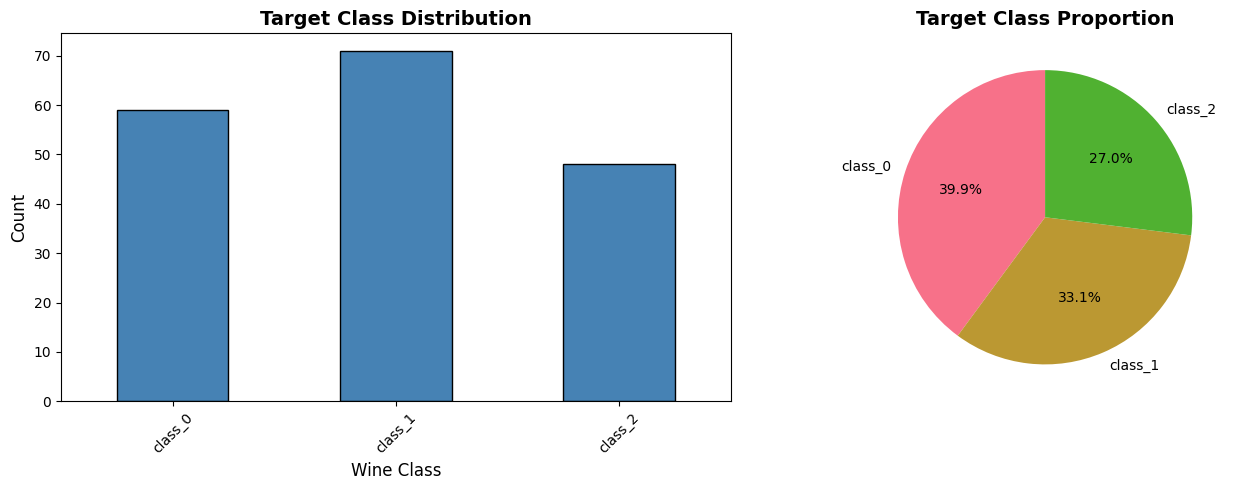

In [6]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Target Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Wine Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(wine_data.target_names, rotation=45)

# Pie chart
df['target'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                  labels=wine_data.target_names, startangle=90)
axes[1].set_title('Target Class Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

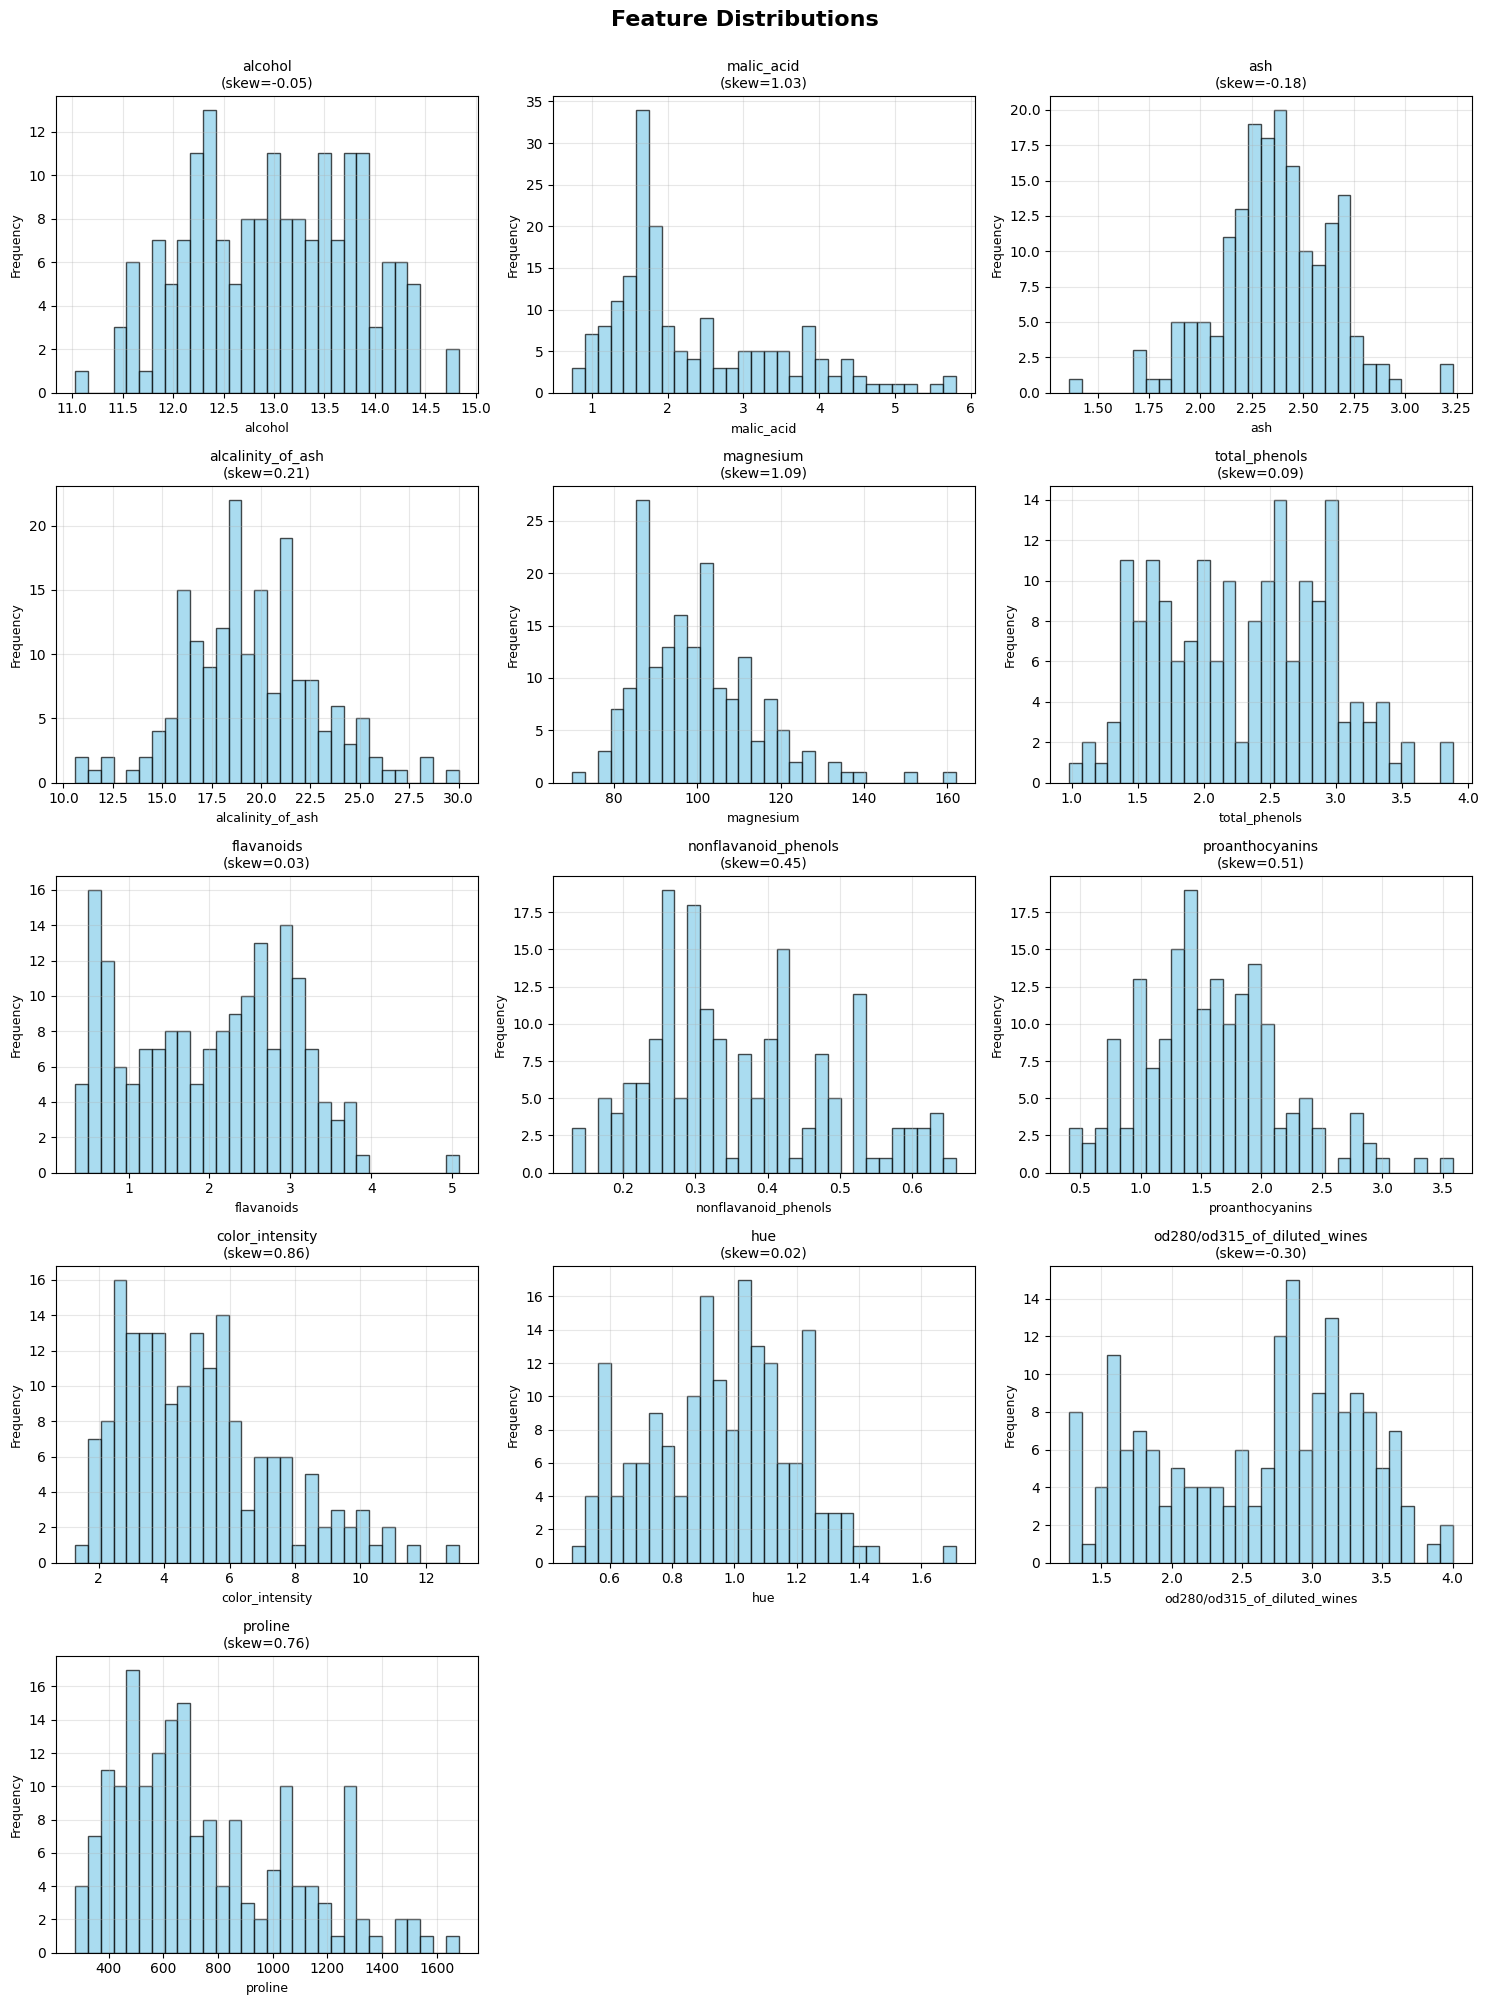

In [7]:
# Distribution plots for all features
features = [col for col in df.columns if col != 'target']
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature}\n(skew={skew(df[feature]):.2f})', fontsize=10)
    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Step 4: Correlation Analysis

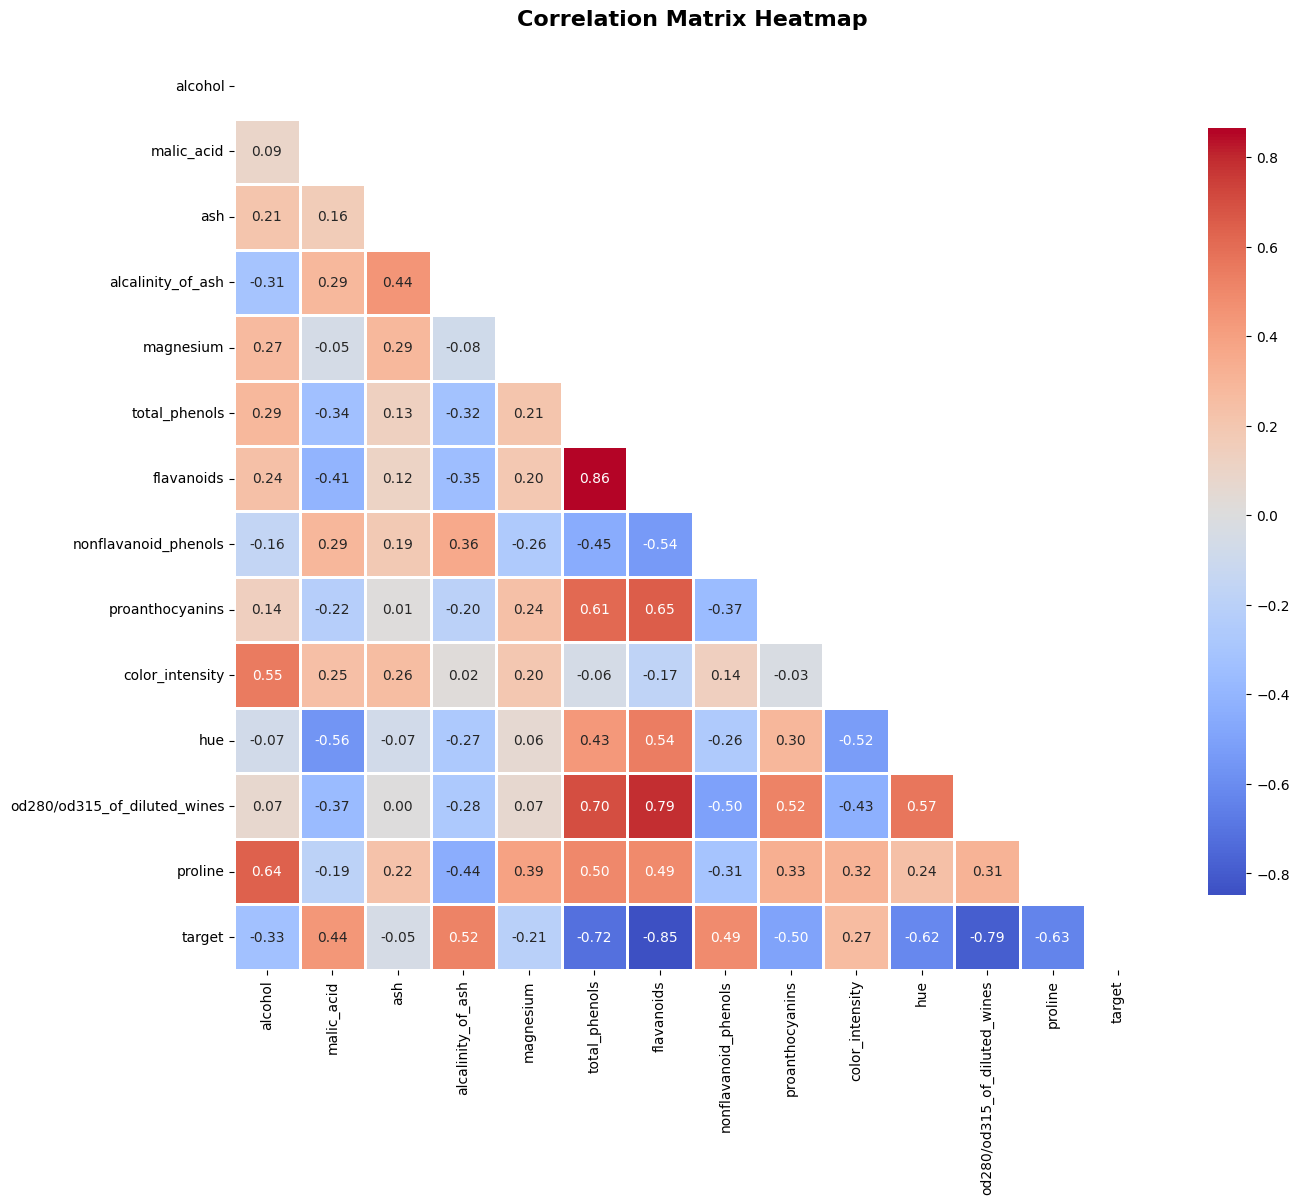

In [8]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

CORRELATIONS WITH TARGET

Top positive correlations with target:
alcalinity_of_ash       0.518
nonflavanoid_phenols    0.489
malic_acid              0.438
color_intensity         0.266
ash                    -0.050
Name: target, dtype: float64

Top negative correlations with target:
hue                            -0.617
proline                        -0.634
total_phenols                  -0.719
od280/od315_of_diluted_wines   -0.788
flavanoids                     -0.847
Name: target, dtype: float64


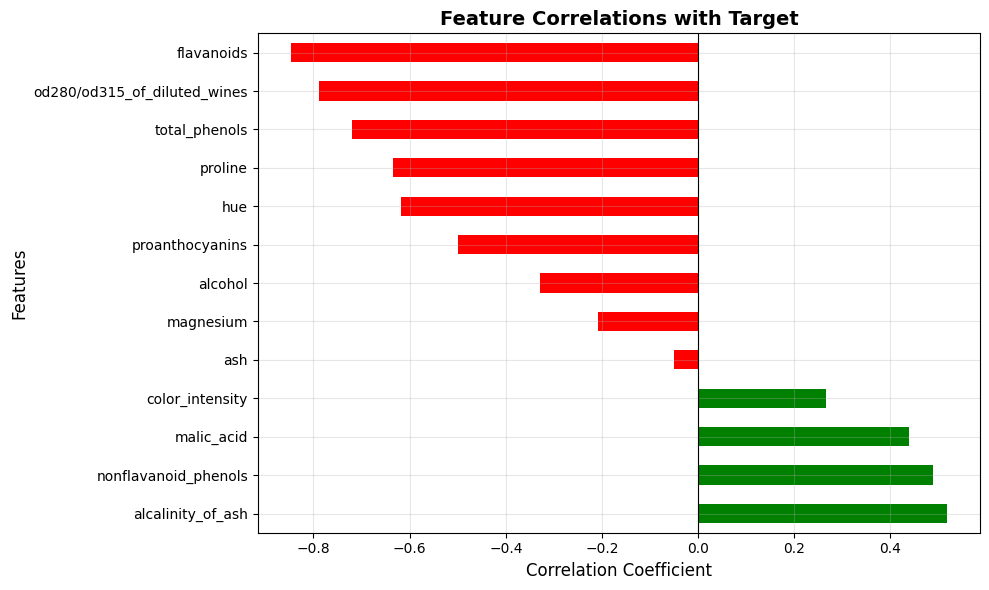

In [9]:
# Find strong correlations with target
print("=" * 50)
print("CORRELATIONS WITH TARGET")
print("=" * 50)

target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print("\nTop positive correlations with target:")
print(target_corr.head(5))

print("\nTop negative correlations with target:")
print(target_corr.tail(5))

# Visualize correlations with target
plt.figure(figsize=(10, 6))
target_corr.plot(kind='barh', color=['green' if x > 0 else 'red' for x in target_corr])
plt.title('Feature Correlations with Target', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 5: Outlier Detection

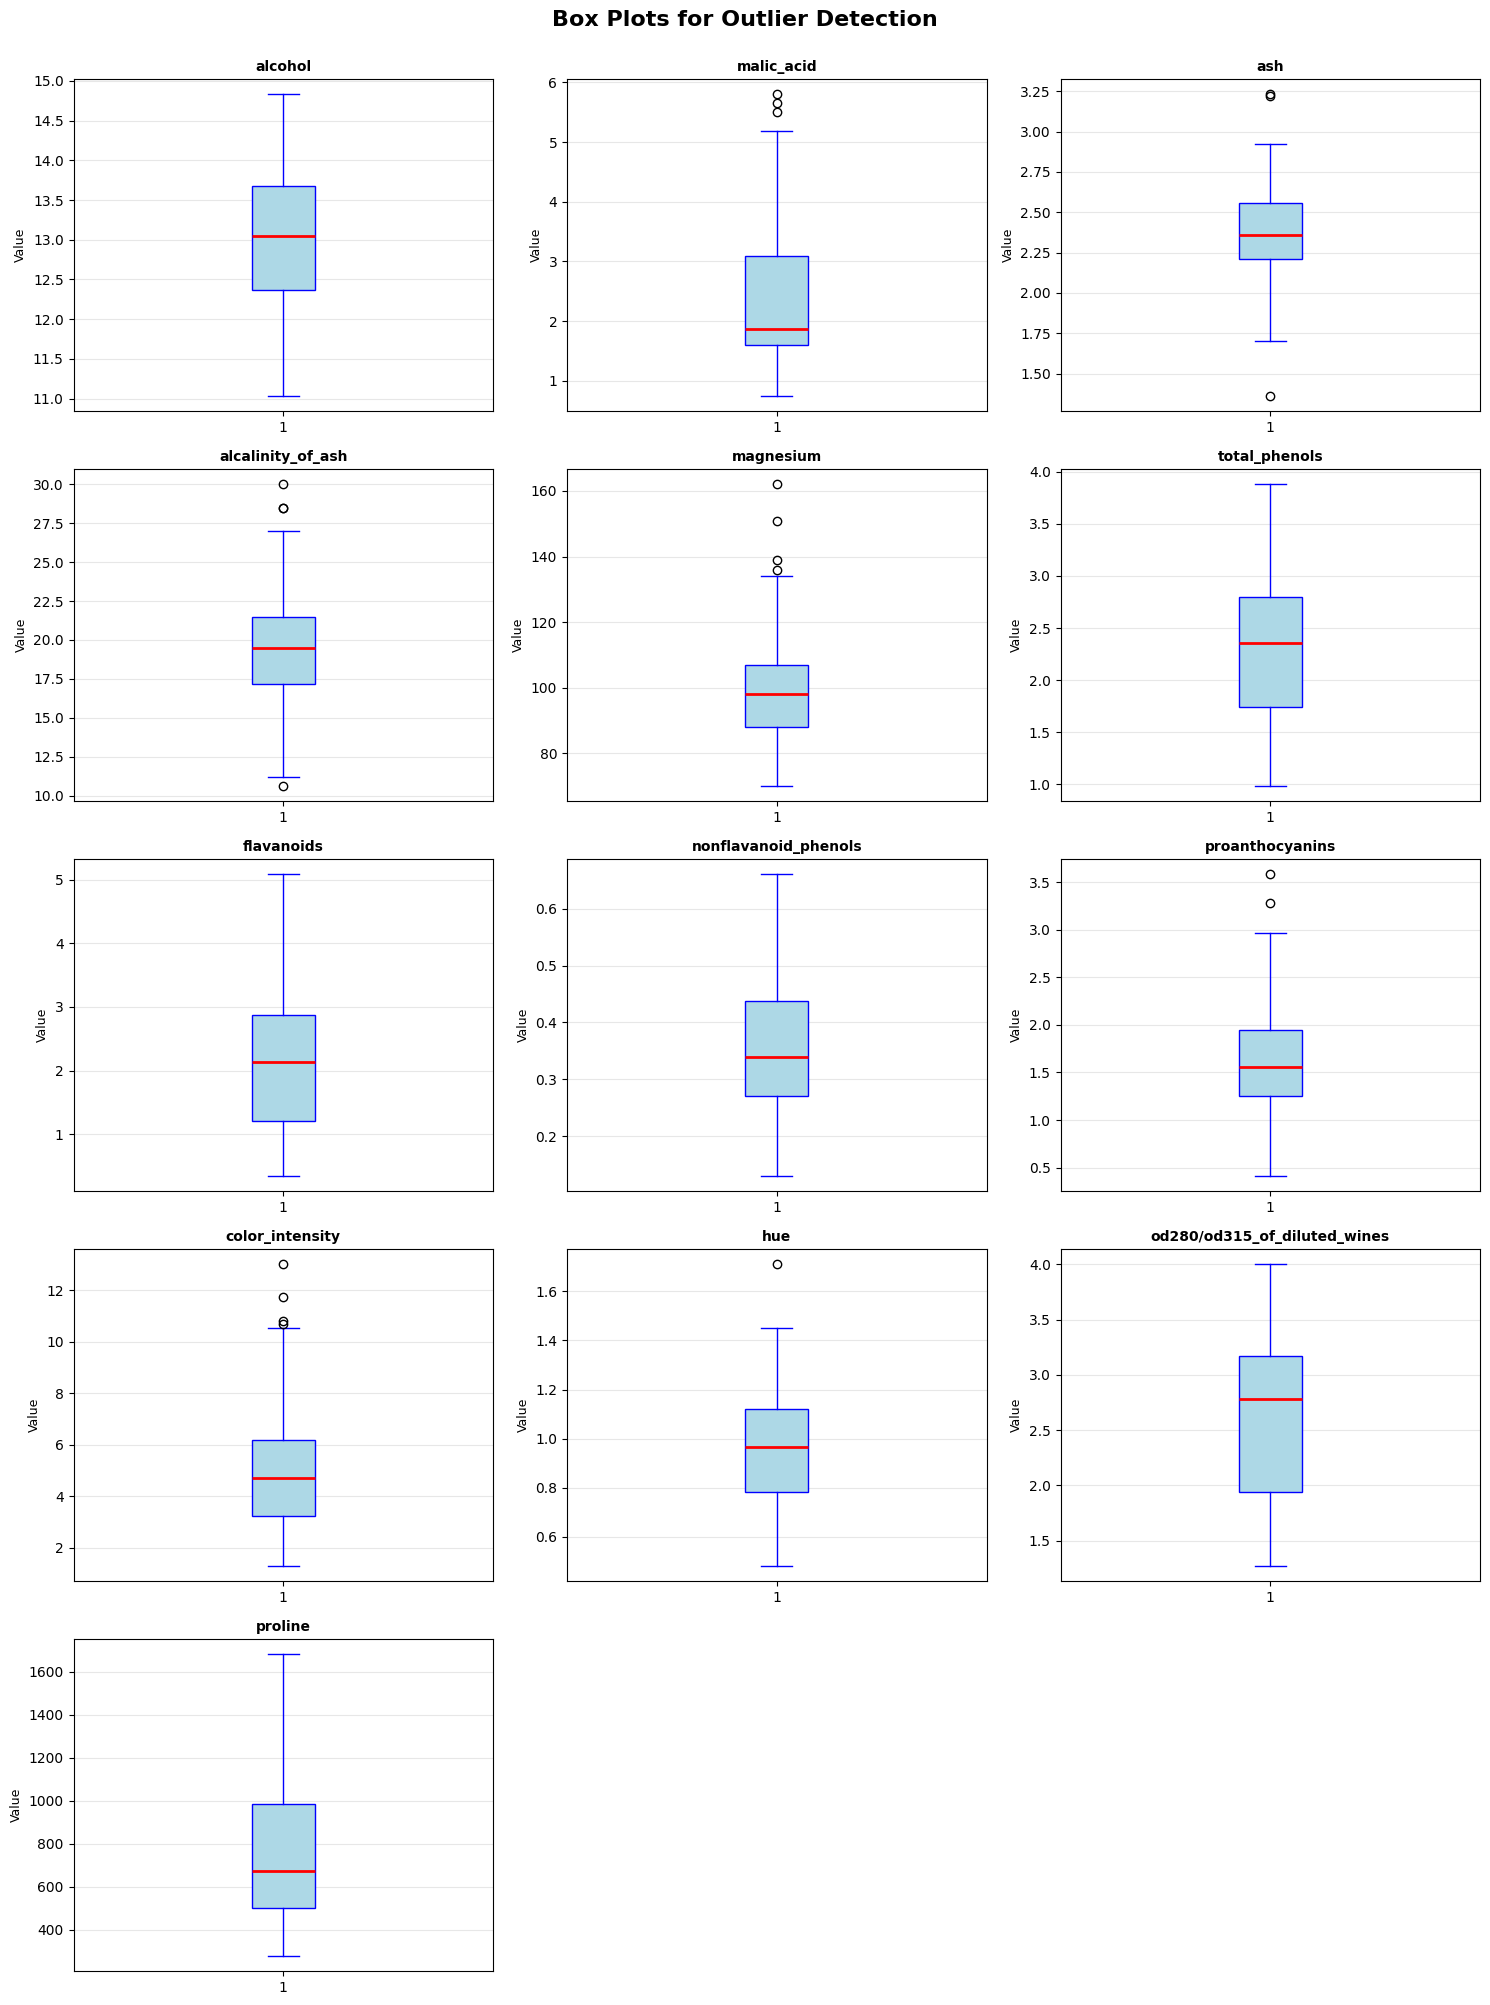

In [10]:
# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='blue'))
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [11]:
# Identify outliers using IQR method
def detect_outliers_iqr(data, feature):
    """Detect outliers using the IQR method"""
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("=" * 50)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 50)

for feature in features:
    n_outliers, lower, upper = detect_outliers_iqr(df, feature)
    if n_outliers > 0:
        print(f"{feature:30s}: {n_outliers:3d} outliers (bounds: [{lower:.2f}, {upper:.2f}])")

OUTLIER DETECTION (IQR Method)
malic_acid                    :   3 outliers (bounds: [-0.62, 5.30])
ash                           :   3 outliers (bounds: [1.69, 3.08])
alcalinity_of_ash             :   4 outliers (bounds: [10.75, 27.95])
magnesium                     :   4 outliers (bounds: [59.50, 135.50])
proanthocyanins               :   2 outliers (bounds: [0.20, 3.00])
color_intensity               :   4 outliers (bounds: [-1.25, 10.67])
hue                           :   1 outliers (bounds: [0.28, 1.63])


# Advanced Feature Engineering

Now that we've thoroughly explored our data, let's create advanced features that can improve model performance.

## Step 1: Polynomial Features

In [12]:
# Select a few important features for polynomial transformation
# (Using all features would create too many features)
important_features = ['flavanoids', 'color_intensity', 'proline', 'alcohol']
X_subset = df[important_features].copy()

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_subset)
poly_feature_names = poly.get_feature_names_out(important_features)

print("=" * 50)
print("POLYNOMIAL FEATURE ENGINEERING")
print("=" * 50)
print(f"Original features: {X_subset.shape[1]}")
print(f"Polynomial features (degree 2): {X_poly.shape[1]}")
print(f"\nNew features created: {X_poly.shape[1] - X_subset.shape[1]}")
print(f"\nFeature names:")
for i, name in enumerate(poly_feature_names):
    print(f"  {i+1:2d}. {name}")

POLYNOMIAL FEATURE ENGINEERING
Original features: 4
Polynomial features (degree 2): 14

New features created: 10

Feature names:
   1. flavanoids
   2. color_intensity
   3. proline
   4. alcohol
   5. flavanoids^2
   6. flavanoids color_intensity
   7. flavanoids proline
   8. flavanoids alcohol
   9. color_intensity^2
  10. color_intensity proline
  11. color_intensity alcohol
  12. proline^2
  13. proline alcohol
  14. alcohol^2


## Step 2: Interaction Features

In [13]:
# Create domain-specific interaction features
df_engineered = df.copy()

# Ratio features (can capture relationships better than individual features)
df_engineered['flavanoids_to_phenols'] = df['flavanoids'] / (df['total_phenols'] + 1e-5)
df_engineered['alcohol_to_acid'] = df['alcohol'] / (df['malic_acid'] + 1e-5)
df_engineered['color_density'] = df['color_intensity'] * df['od280/od315_of_diluted_wines']

# Product features
df_engineered['alcohol_flavanoids'] = df['alcohol'] * df['flavanoids']
df_engineered['proline_color'] = df['proline'] * df['color_intensity']

# Sum features
df_engineered['total_phenolic_content'] = df['total_phenols'] + df['flavanoids'] + df['nonflavanoid_phenols']

print("=" * 50)
print("INTERACTION FEATURES CREATED")
print("=" * 50)
print(f"\nNew features:")
new_features = ['flavanoids_to_phenols', 'alcohol_to_acid', 'color_density',
                'alcohol_flavanoids', 'proline_color', 'total_phenolic_content']
for i, feat in enumerate(new_features, 1):
    print(f"  {i}. {feat}")

print(f"\nTotal features: {df_engineered.shape[1]}")
print(f"Features added: {df_engineered.shape[1] - df.shape[1]}")

INTERACTION FEATURES CREATED

New features:
  1. flavanoids_to_phenols
  2. alcohol_to_acid
  3. color_density
  4. alcohol_flavanoids
  5. proline_color
  6. total_phenolic_content

Total features: 20
Features added: 6


## Step 3: Mathematical Transformations for Skewed Features

In [14]:
# Apply log transformation to highly skewed features
skewed_threshold = 0.75
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('target')
skewness = df[numeric_features].apply(lambda x: skew(x))
highly_skewed = skewness[abs(skewness) > skewed_threshold].index.tolist()

print("=" * 50)
print("MATHEMATICAL TRANSFORMATIONS")
print("=" * 50)
print(f"\nHighly skewed features (|skew| > {skewed_threshold}):")
for feat in highly_skewed:
    print(f"  - {feat}: {skewness[feat]:.3f}")

# Apply log transformation
for feature in highly_skewed:
    if (df[feature] > 0).all():  # Only if all values are positive
        df_engineered[f'{feature}_log'] = np.log1p(df[feature])
        print(f"\nCreated: {feature}_log")
        print(f"  Original skewness: {skew(df[feature]):.3f}")
        print(f"  Transformed skewness: {skew(df_engineered[f'{feature}_log']):.3f}")

MATHEMATICAL TRANSFORMATIONS

Highly skewed features (|skew| > 0.75):
  - malic_acid: 1.031
  - magnesium: 1.089
  - color_intensity: 0.861
  - proline: 0.761

Created: malic_acid_log
  Original skewness: 1.031
  Transformed skewness: 0.525

Created: magnesium_log
  Original skewness: 1.089
  Transformed skewness: 0.601

Created: color_intensity_log
  Original skewness: 0.861
  Transformed skewness: 0.096

Created: proline_log
  Original skewness: 0.761
  Transformed skewness: 0.087


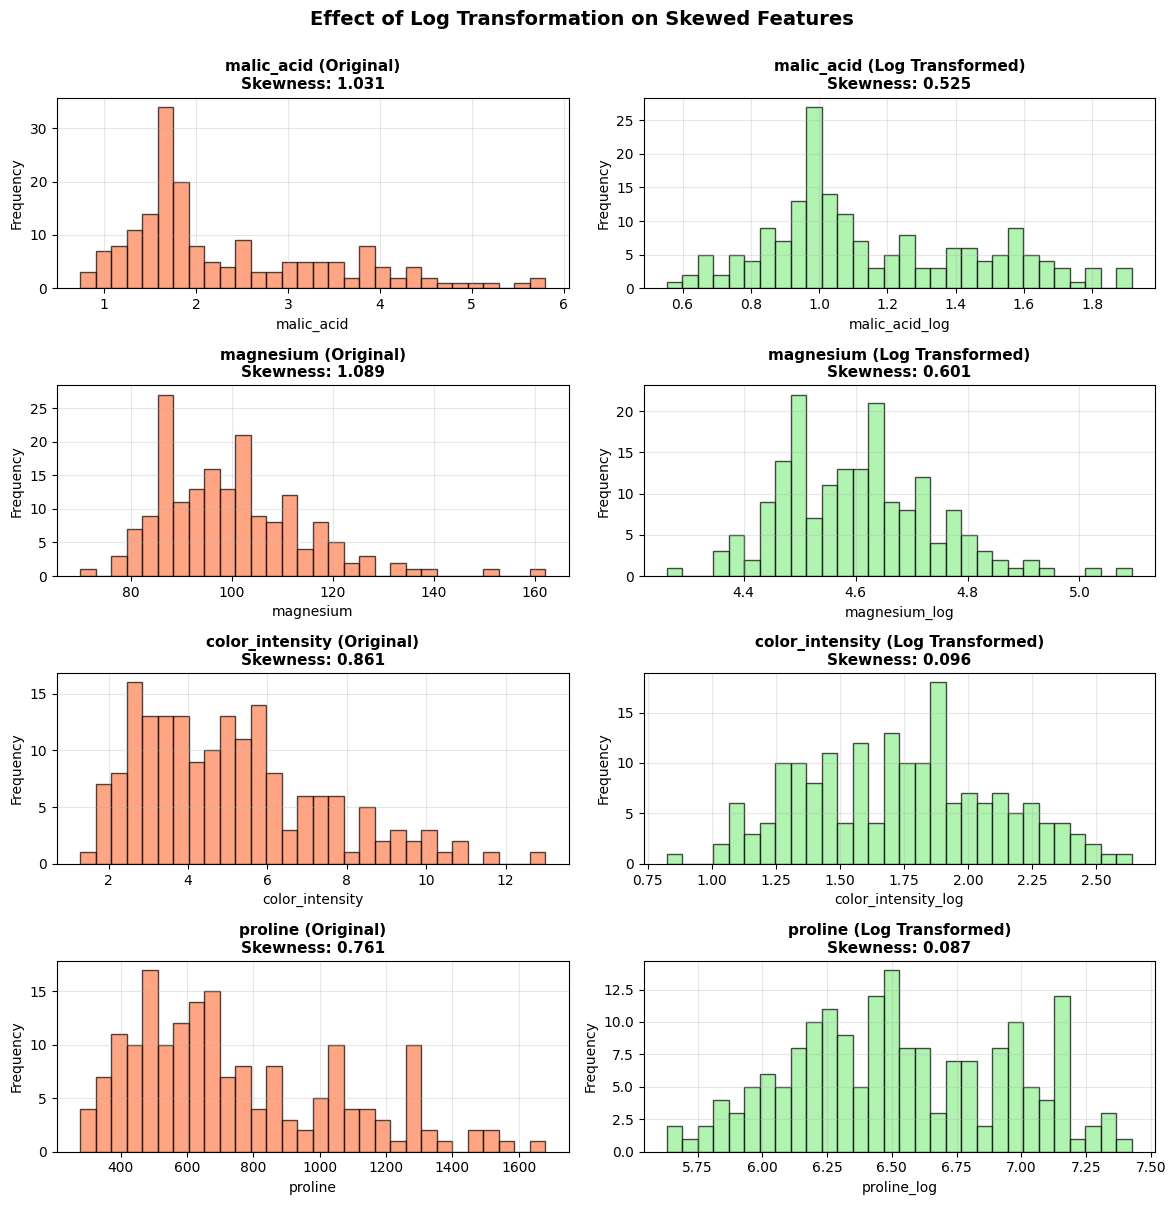

In [15]:
# Visualize the effect of log transformation
if highly_skewed:
    n_skewed = len(highly_skewed)
    fig, axes = plt.subplots(n_skewed, 2, figsize=(12, n_skewed * 3))
    
    if n_skewed == 1:
        axes = axes.reshape(1, -1)
    
    for idx, feature in enumerate(highly_skewed):
        if (df[feature] > 0).all():
            # Original distribution
            axes[idx, 0].hist(df[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
            axes[idx, 0].set_title(f'{feature} (Original)\nSkewness: {skew(df[feature]):.3f}', 
                                   fontsize=11, fontweight='bold')
            axes[idx, 0].set_xlabel(feature)
            axes[idx, 0].set_ylabel('Frequency')
            axes[idx, 0].grid(True, alpha=0.3)
            
            # Log-transformed distribution
            axes[idx, 1].hist(df_engineered[f'{feature}_log'], bins=30, 
                             color='lightgreen', edgecolor='black', alpha=0.7)
            axes[idx, 1].set_title(f'{feature} (Log Transformed)\nSkewness: {skew(df_engineered[f"{feature}_log"]):.3f}',
                                   fontsize=11, fontweight='bold')
            axes[idx, 1].set_xlabel(f'{feature}_log')
            axes[idx, 1].set_ylabel('Frequency')
            axes[idx, 1].grid(True, alpha=0.3)
    
    plt.suptitle('Effect of Log Transformation on Skewed Features', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

## Step 4: Feature Scaling

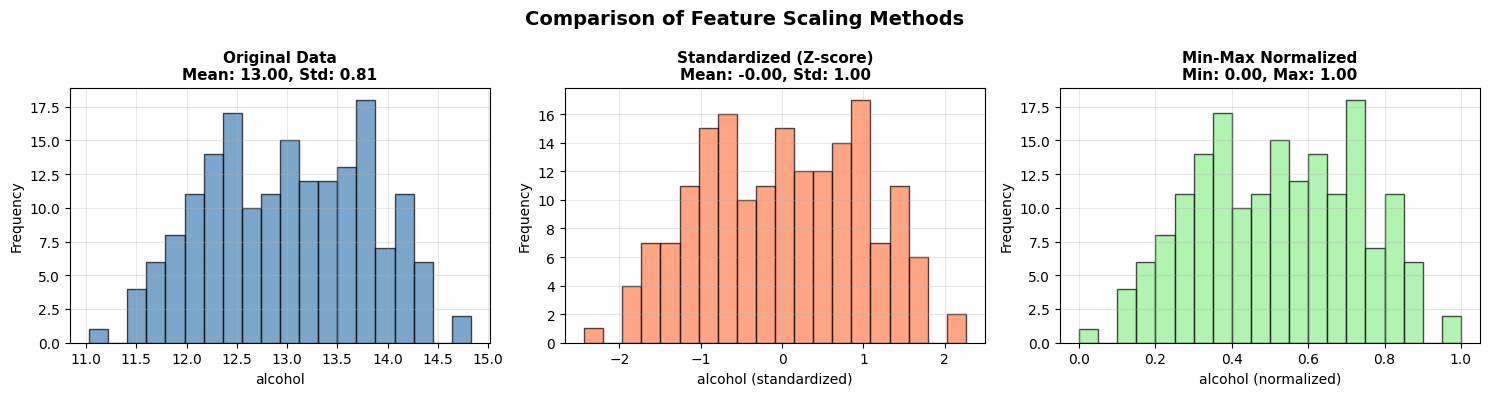

FEATURE SCALING STATISTICS

Original: min=11.03, max=14.83, mean=13.00, std=0.81
Standardized: min=-2.43, max=2.26, mean=-0.00, std=1.00
Min-Max: min=0.00, max=1.00, mean=0.52, std=0.21


In [16]:
# Demonstrate different scaling methods
feature_to_scale = 'alcohol'

# Original data
original_data = df[feature_to_scale].values.reshape(-1, 1)

# Standardization (Z-score)
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(original_data)

# Min-Max normalization
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(original_data)

# Visualize scaling effects
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(original_data, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f'Original Data\nMean: {original_data.mean():.2f}, Std: {original_data.std():.2f}',
                  fontsize=11, fontweight='bold')
axes[0].set_xlabel(feature_to_scale)
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[1].hist(standardized_data, bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title(f'Standardized (Z-score)\nMean: {standardized_data.mean():.2f}, Std: {standardized_data.std():.2f}',
                  fontsize=11, fontweight='bold')
axes[1].set_xlabel(f'{feature_to_scale} (standardized)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

axes[2].hist(normalized_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title(f'Min-Max Normalized\nMin: {normalized_data.min():.2f}, Max: {normalized_data.max():.2f}',
                  fontsize=11, fontweight='bold')
axes[2].set_xlabel(f'{feature_to_scale} (normalized)')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Comparison of Feature Scaling Methods', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 50)
print("FEATURE SCALING STATISTICS")
print("=" * 50)
print(f"\nOriginal: min={original_data.min():.2f}, max={original_data.max():.2f}, "
      f"mean={original_data.mean():.2f}, std={original_data.std():.2f}")
print(f"Standardized: min={standardized_data.min():.2f}, max={standardized_data.max():.2f}, "
      f"mean={standardized_data.mean():.2f}, std={standardized_data.std():.2f}")
print(f"Min-Max: min={normalized_data.min():.2f}, max={normalized_data.max():.2f}, "
      f"mean={normalized_data.mean():.2f}, std={normalized_data.std():.2f}")

# Feature Selection Techniques

Now that we've created many new features, we need to select the most important ones to avoid overfitting and reduce computational complexity.

## Method 1: Variance Threshold

In [17]:
# Remove low variance features
X = df_engineered.drop('target', axis=1)
y = df_engineered['target']

# Calculate variance for each feature
variances = X.var().sort_values(ascending=True)

print("=" * 50)
print("VARIANCE THRESHOLD ANALYSIS")
print("=" * 50)
print("\nLowest variance features:")
print(variances.head(10))

# Apply variance threshold
selector = VarianceThreshold(threshold=0.1)
X_high_variance = selector.fit_transform(X)

selected_features = X.columns[selector.get_support()].tolist()
removed_features = X.columns[~selector.get_support()].tolist()

print(f"\nFeatures remaining: {len(selected_features)}")
print(f"Features removed: {len(removed_features)}")
if removed_features:
    print(f"\nRemoved features: {removed_features}")

VARIANCE THRESHOLD ANALYSIS

Lowest variance features:
nonflavanoid_phenols     0.015
magnesium_log            0.018
hue                      0.052
ash                      0.075
flavanoids_to_phenols    0.080
malic_acid_log           0.096
color_intensity_log      0.139
proline_log              0.172
proanthocyanins          0.328
total_phenols            0.392
dtype: float64

Features remaining: 17
Features removed: 6

Removed features: ['ash', 'nonflavanoid_phenols', 'hue', 'flavanoids_to_phenols', 'malic_acid_log', 'magnesium_log']


## Method 2: Univariate Feature Selection

UNIVARIATE FEATURE SELECTION (ANOVA F-test)

Top 10 features:
                     Feature   Score
          alcohol_flavanoids 270.515
                  flavanoids 233.926
                     proline 207.920
od280/od315_of_diluted_wines 189.972
                 proline_log 182.957
      total_phenolic_content 180.172
       flavanoids_to_phenols 171.337
         color_intensity_log 153.145
                     alcohol 135.078
               proline_color 122.044


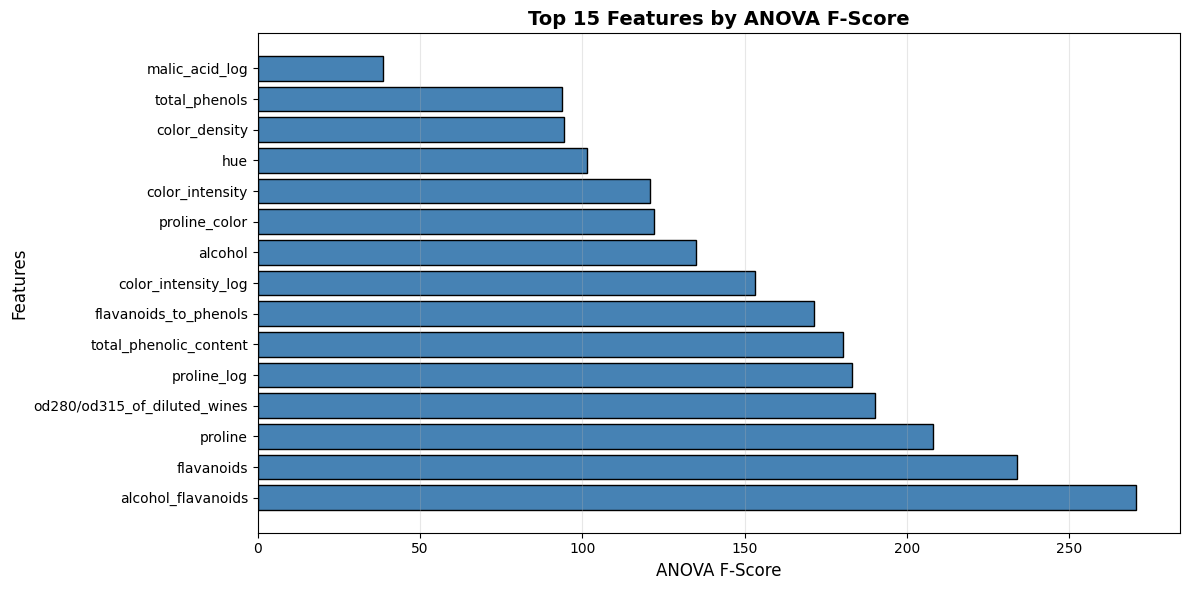

In [18]:
# Select top K features based on ANOVA F-statistic
k_best = 10
selector_univariate = SelectKBest(score_func=f_classif, k=k_best)
X_kbest = selector_univariate.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_univariate.scores_
}).sort_values('Score', ascending=False)

print("=" * 50)
print("UNIVARIATE FEATURE SELECTION (ANOVA F-test)")
print("=" * 50)
print(f"\nTop {k_best} features:")
print(feature_scores.head(k_best).to_string(index=False))

# Visualize feature scores
plt.figure(figsize=(12, 6))
top_features = feature_scores.head(15)
plt.barh(range(len(top_features)), top_features['Score'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('ANOVA F-Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Features by ANOVA F-Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Method 3: Recursive Feature Elimination (RFE)

In [19]:
# Use Random Forest for RFE
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf_model, n_features_to_select=10, step=1)
rfe_selector.fit(X, y)

# Get selected features
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_selector.ranking_,
    'Selected': rfe_selector.support_
}).sort_values('Ranking')

print("=" * 50)
print("RECURSIVE FEATURE ELIMINATION (RFE)")
print("=" * 50)
print("\nTop 10 features selected by RFE:")
print(rfe_features[rfe_features['Selected']].to_string(index=False))

RECURSIVE FEATURE ELIMINATION (RFE)

Top 10 features selected by RFE:
                     Feature  Ranking  Selected
                  flavanoids        1      True
       flavanoids_to_phenols        1      True
od280/od315_of_diluted_wines        1      True
             color_intensity        1      True
                     proline        1      True
      total_phenolic_content        1      True
               proline_color        1      True
          alcohol_flavanoids        1      True
         color_intensity_log        1      True
                 proline_log        1      True


## Method 4: Feature Importance from Random Forest

FEATURE IMPORTANCE (Random Forest)

Top 15 most important features:
                     Feature  Importance
               proline_color       0.103
                 proline_log       0.092
         color_intensity_log       0.090
                     proline       0.082
                  flavanoids       0.078
             color_intensity       0.077
          alcohol_flavanoids       0.073
      total_phenolic_content       0.070
od280/od315_of_diluted_wines       0.063
       flavanoids_to_phenols       0.059
                     alcohol       0.053
                         hue       0.048
               color_density       0.023
               total_phenols       0.019
                  malic_acid       0.013


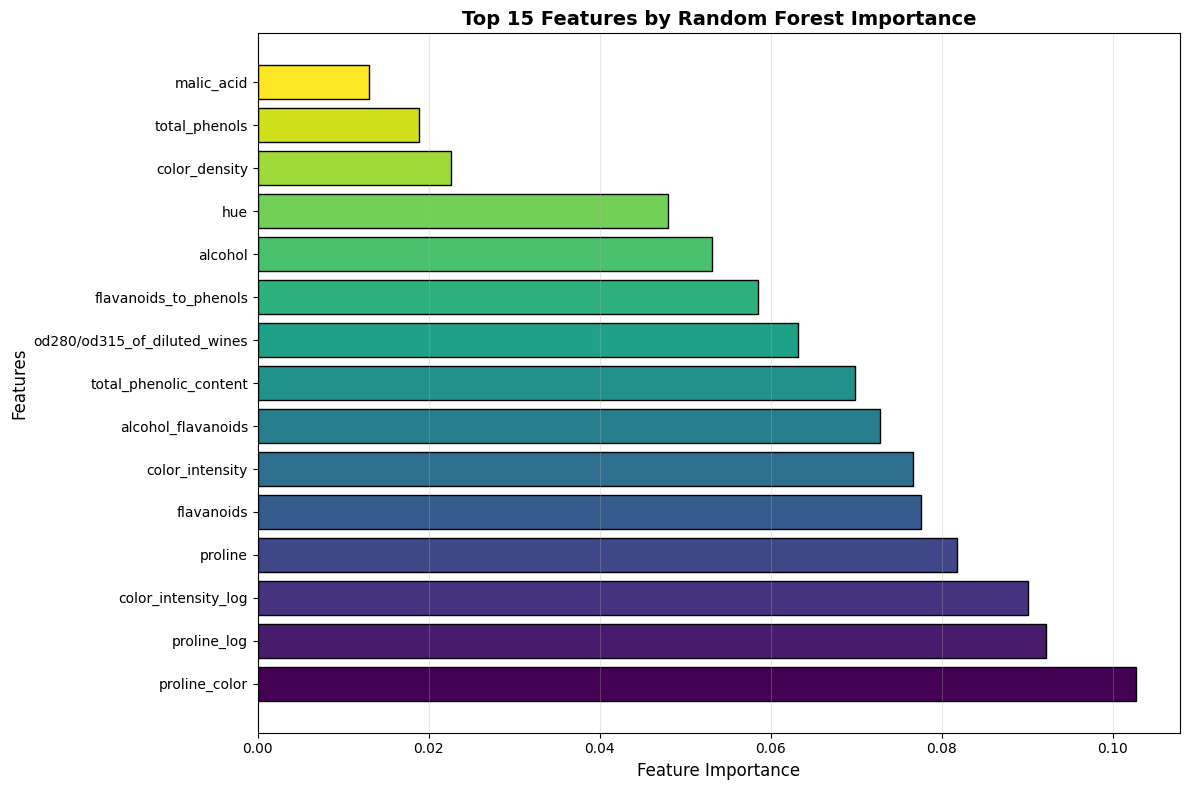

In [20]:
# Train Random Forest and extract feature importances
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10)
rf_model.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 50)
print("FEATURE IMPORTANCE (Random Forest)")
print("=" * 50)
print("\nTop 15 most important features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importances
plt.figure(figsize=(12, 8))
top_n = 15
top_features = feature_importance.head(top_n)
colors = plt.cm.viridis(np.linspace(0, 1, top_n))
plt.barh(range(top_n), top_features['Importance'], color=colors, edgecolor='black')
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Features by Random Forest Importance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Hands-On Activity: Building a Model with Engineered Features

Let's compare model performance using:
1. Original features only
2. Engineered features (all features)
3. Selected features (top features only)

In [21]:
# Prepare datasets
from sklearn.model_selection import cross_val_score

# Dataset 1: Original features
X_original = df.drop('target', axis=1)
y_original = df['target']

# Dataset 2: All engineered features
X_engineered = df_engineered.drop('target', axis=1)
y_engineered = df_engineered['target']

# Dataset 3: Selected top features (from feature importance)
top_features_list = feature_importance.head(10)['Feature'].tolist()
X_selected = df_engineered[top_features_list]
y_selected = df_engineered['target']

print("=" * 50)
print("DATASET COMPARISON")
print("=" * 50)
print(f"\n1. Original features: {X_original.shape[1]} features")
print(f"2. All engineered features: {X_engineered.shape[1]} features")
print(f"3. Selected features: {X_selected.shape[1]} features")
print(f"\nSelected features: {top_features_list}")

DATASET COMPARISON

1. Original features: 13 features
2. All engineered features: 23 features
3. Selected features: 10 features

Selected features: ['proline_color', 'proline_log', 'color_intensity_log', 'proline', 'flavanoids', 'color_intensity', 'alcohol_flavanoids', 'total_phenolic_content', 'od280/od315_of_diluted_wines', 'flavanoids_to_phenols']


In [22]:
# Compare model performance
models_comparison = []

datasets = [
    ('Original Features', X_original, y_original),
    ('All Engineered Features', X_engineered, y_engineered),
    ('Selected Features', X_selected, y_selected)
]

for name, X, y in datasets:
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10)
    scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
    
    models_comparison.append({
        'Dataset': name,
        'Mean Accuracy': scores.mean(),
        'Std Accuracy': scores.std(),
        'Min Accuracy': scores.min(),
        'Max Accuracy': scores.max()
    })

# Display results
results_df = pd.DataFrame(models_comparison)
print("\n" + "=" * 50)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 50)
print(results_df.to_string(index=False))


MODEL PERFORMANCE COMPARISON
                Dataset  Mean Accuracy  Std Accuracy  Min Accuracy  Max Accuracy
      Original Features          0.967         0.021         0.944           1.0
All Engineered Features          0.983         0.014         0.971           1.0
      Selected Features          0.961         0.028         0.917           1.0


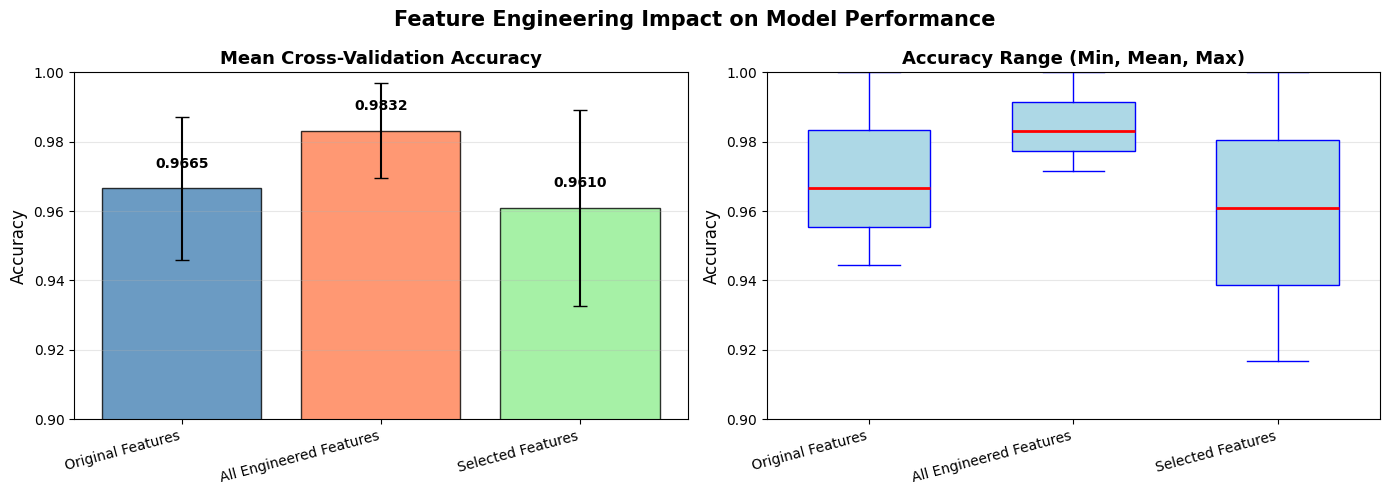

In [23]:
# Visualize performance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of mean accuracy
x_pos = np.arange(len(results_df))
ax1.bar(x_pos, results_df['Mean Accuracy'], yerr=results_df['Std Accuracy'],
        color=['steelblue', 'coral', 'lightgreen'], edgecolor='black',
        capsize=5, alpha=0.8)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Dataset'], rotation=15, ha='right')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Mean Cross-Validation Accuracy', fontsize=13, fontweight='bold')
ax1.set_ylim([0.9, 1.0])
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(results_df['Mean Accuracy']):
    ax1.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Box plot showing min/max range
data_for_box = [
    [results_df.iloc[i]['Min Accuracy'], 
     results_df.iloc[i]['Mean Accuracy'],
     results_df.iloc[i]['Max Accuracy']] 
    for i in range(len(results_df))
]

positions = np.arange(1, len(results_df) + 1)
bp = ax2.boxplot(data_for_box, positions=positions, widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='blue'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='blue'),
                 capprops=dict(color='blue'))

ax2.set_xticks(positions)
ax2.set_xticklabels(results_df['Dataset'], rotation=15, ha='right')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Accuracy Range (Min, Mean, Max)', fontsize=13, fontweight='bold')
ax2.set_ylim([0.9, 1.0])
ax2.grid(True, alpha=0.3, axis='y')

plt.suptitle('Feature Engineering Impact on Model Performance', 
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# Key Takeaways

Congratulations on completing Day 97! Let's summarize the essential concepts and skills you've learned:

## Exploratory Data Analysis

1. **Systematic Data Exploration**: Always start with comprehensive data exploration before modeling. Use both statistical methods (mean, median, variance, skewness, kurtosis) and visualizations (histograms, box plots, correlation heatmaps) to understand your data.

2. **Data Quality Assessment**: Check for missing values, outliers, and data inconsistencies. Use the IQR method or Z-score method for outlier detection. Understanding your data quality issues is crucial before making preprocessing decisions.

3. **Correlation Analysis**: Understanding relationships between features and the target variable helps in feature selection and engineering. Strong correlations can indicate redundant features or important predictive relationships.

## Advanced Feature Engineering

4. **Feature Creation Strategies**: 
   - Polynomial features capture non-linear relationships
   - Interaction features reveal how features work together
   - Ratio features can be more informative than individual features
   - Domain-specific features leverage expert knowledge

5. **Handling Skewness**: Log transformations and other mathematical transformations can normalize skewed distributions, which often improves model performance, especially for algorithms sensitive to feature distributions.

6. **Feature Scaling**: Different scaling methods serve different purposes:
   - Standardization (Z-score) is preferred for algorithms assuming normal distributions
   - Min-Max normalization is useful when you need bounded values
   - Both are essential for distance-based algorithms and neural networks

7. **Feature Selection**: More features don't always mean better performance. Use multiple methods:
   - Variance threshold removes low-information features
   - Univariate selection identifies statistically significant features
   - RFE provides model-based recursive selection
   - Tree-based feature importance offers interpretable rankings

## Practical Insights

8. **Balance is Key**: While feature engineering can significantly improve performance, too many features can lead to overfitting and increased computational costs. Always validate that added features genuinely improve model performance.

9. **Iterative Process**: EDA and feature engineering are iterative processes. Insights from one round of analysis often lead to new ideas for feature creation and refinement.

10. **Documentation**: Always document your feature engineering decisions and their rationale. This is crucial for reproducibility and for explaining your model to stakeholders.

# Further Resources

To deepen your understanding of EDA and feature engineering, explore these resources:

## Documentation and Tutorials

1. **Pandas Documentation - Data Exploration**
   - https://pandas.pydata.org/docs/user_guide/basics.html
   - Comprehensive guide to data manipulation and exploration with pandas

2. **Scikit-learn Preprocessing**
   - https://scikit-learn.org/stable/modules/preprocessing.html
   - Official documentation on feature scaling, transformation, and encoding

3. **Scikit-learn Feature Selection**
   - https://scikit-learn.org/stable/modules/feature_selection.html
   - Complete guide to feature selection methods in scikit-learn

4. **Seaborn Tutorial - Data Visualization**
   - https://seaborn.pydata.org/tutorial.html
   - Learn advanced visualization techniques for EDA

## Books and Papers

5. **"Feature Engineering for Machine Learning" by Alice Zheng and Amanda Casari**
   - Comprehensive book on practical feature engineering techniques

6. **"An Introduction to Statistical Learning" by James, Witten, Hastie, and Tibshirani**
   - Chapter 6 covers linear model selection and regularization
   - Free PDF available at: https://www.statlearning.com/

## Additional Topics to Explore

- **Automated Feature Engineering**: Tools like Featuretools for automated feature generation
- **Advanced Transformations**: Box-Cox, Yeo-Johnson transformations for normalization
- **Target Encoding**: Encoding categorical variables using target statistics
- **Time Series Features**: Lag features, rolling statistics, seasonal decomposition
- **Text Features**: TF-IDF, word embeddings, and NLP feature engineering
- **Image Features**: Feature extraction from images using CNN embeddings

## Practice Datasets

Apply these techniques to other datasets:
- UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
- Kaggle Datasets: https://www.kaggle.com/datasets
- OpenML: https://www.openml.org/

---

**Congratulations on completing Day 97!** You now have powerful tools for exploring data and engineering features that will serve you well in your capstone project and future machine learning endeavors. Tomorrow, we'll focus on model selection, training, and hyperparameter tuning to build high-performance models with these carefully crafted features.